<h1>Personalized CancerDiagnosis -Task-2<h2>

<h4>Importing the required libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.classification import log_loss
import sys

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Read the data with the help of pandas

In [2]:
data_var=pd.read_csv('training_variants_.txt',sep=',')
data_text=pd.read_csv('training_text_.txt',sep='\|\|',names=['ID','Text'],skiprows=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
data_text.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
data_var.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


Summary of the dataset

In [5]:
data_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [6]:
data_var.shape

(3321, 4)

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      720 non-null    int64 
 1   Text    720 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [8]:
data_text.shape

(720, 2)

To check the null value

In [9]:
data_var.isna().any()

ID           False
Gene         False
Variation    False
Class        False
dtype: bool

In [10]:
data_text.isna().any()

ID      False
Text    False
dtype: bool

Descriptive Statistics

In [11]:
data_var.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


Visualization

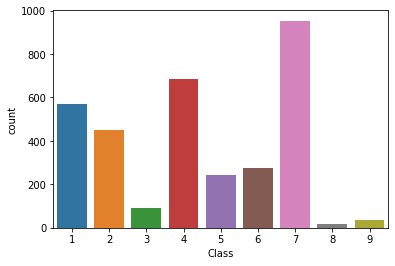

In [12]:
sns.countplot(x="Class",data=data_var)

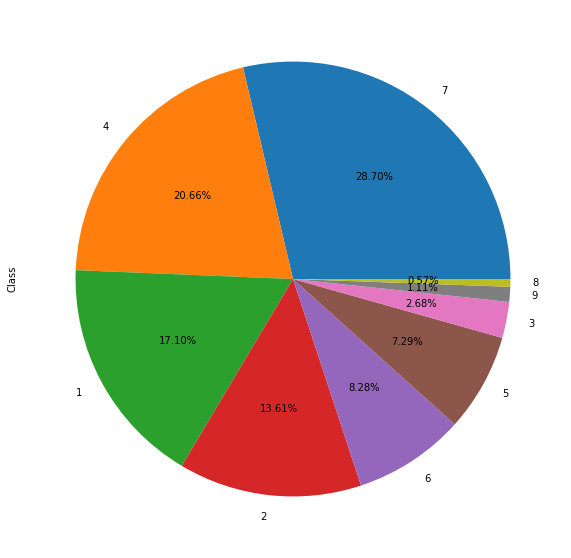

In [13]:
data_var['Class'].value_counts().plot(kind="pie",explode=[0,0,0,0,0,0,0,0,0],figsize=(10,10),autopct="%1.2f%%")

Text Preprocessing

In [14]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import string
def columns(text):
    review=re.sub('[^a-zA-Z0-9]',' ',str(text))
    # replace multiple spaces with single space
    review= re.sub('\s+',' ', review)
    review=review.lower()
    review=review.split()
    review=[word for word in review if word not in stopwords.words('english')]
    return " ".join(review)
data_text['Text']=data_text['Text'].apply(columns)
data_text.head(5)

,ID,Text
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


Merging 

In [16]:
result=pd.merge(data_var,data_text,on='ID',how='left')
result.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [17]:
result[result.isna().any(axis=1)].head()

,ID,Gene,Variation,Class,Text
720,720,ERBB2,S310F,7,NaN
721,721,ERBB2,S335C,2,NaN
722,722,ERBB2,L785F,6,NaN
723,723,ERBB2,L915M,6,NaN
724,724,ERBB2,C334S,7,NaN


Fill the Text feature null values with Gene and variation features

In [18]:
result.loc[result['Text'].isna(),'Text']=result['Gene']+" "+result['Variation']

In [19]:
result[result.isna().any(axis=1)].head()

,ID,Gene,Variation,Class,Text


In [20]:
result[result['ID']==1203]

,ID,Gene,Variation,Class,Text
1203,1203,PIK3CA,A1020V,5,PIK3CA A1020V


Replacing the underscore insead of Double Space

In [21]:
result['Gene']=result['Gene'].str.replace('\s+','_')
result['Variation']=result['Variation'].str.replace('\s+','_')

Splitting the data into train,test and cv

In [22]:
y=result['Class'].values

In [23]:
from sklearn.model_selection import train_test_split
#Train and Test 80:20
X_train,X_test,y_train,y_test=train_test_split(result,y,stratify=y,test_size=0.2)
#Training and cross validation
X_train_cv,X_test_cv,y_train_cv,y_cv=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)

In [24]:
y_train_cv.shape

(2124,)

In [25]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in cv_train data:', X_train_cv.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_test_cv.shape[0])

Number of data points in train data: 2656
Number of data points in cv_train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


In [26]:
sys.setrecursionlimit(15000)

In [27]:
print(sys.getrecursionlimit())

15000


In [28]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4235692153259416
Log loss on Test Data using Random Model 2.446896946005161
-------------------- Confusion matrix --------------------


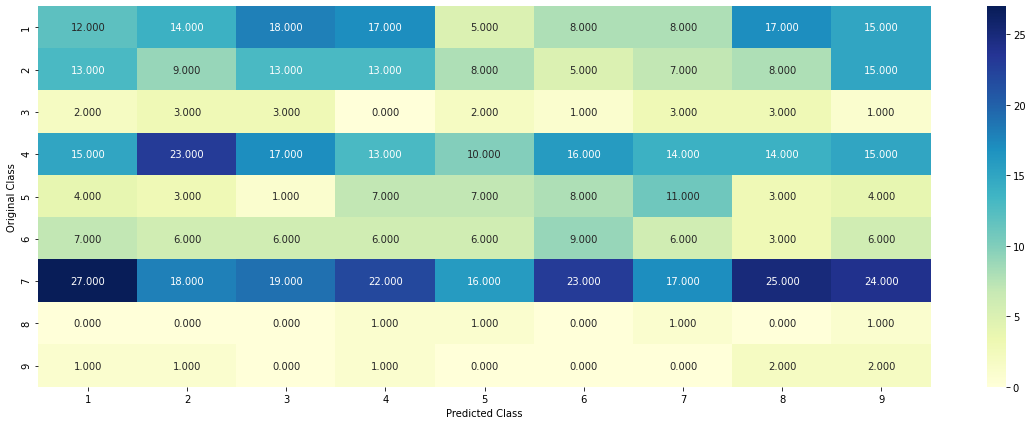

-------------------- Precision matrix (Columm Sum=1) --------------------


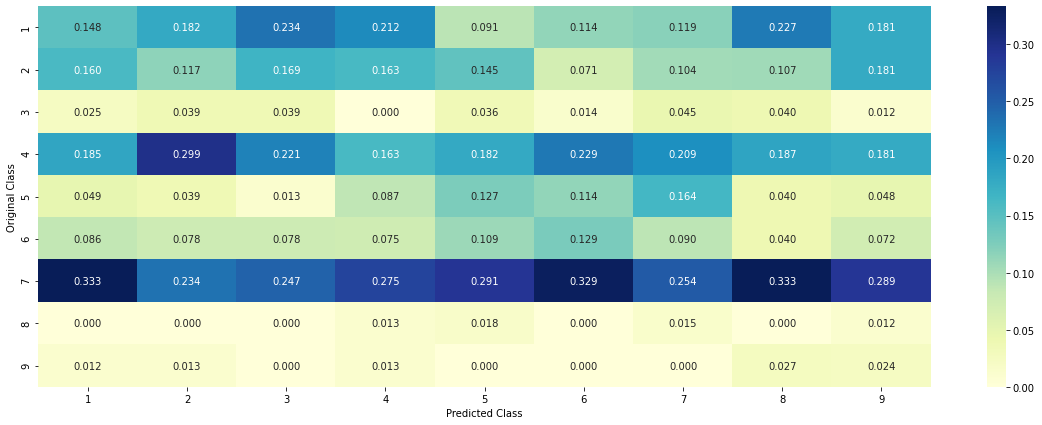

-------------------- Recall matrix (Row sum=1) --------------------


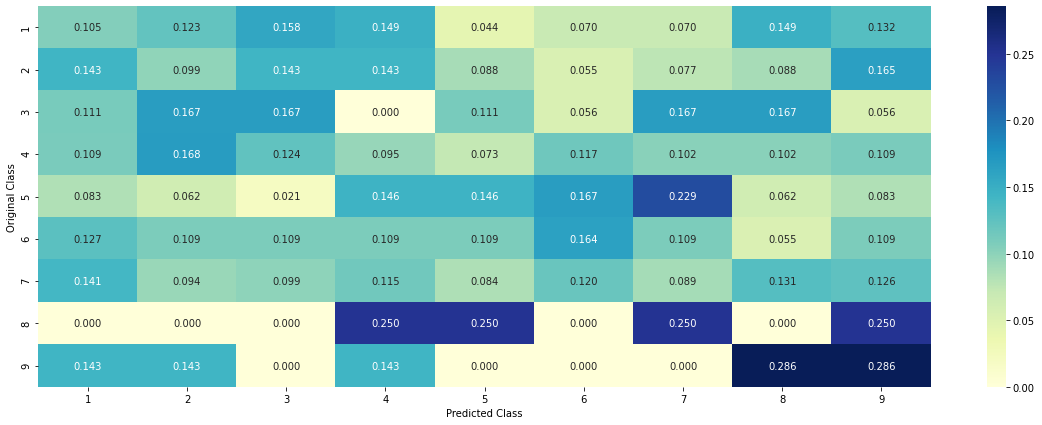

In [29]:
from sklearn.metrics import confusion_matrix
test_datalen=X_test.shape[0]
cv_datalen=X_test_cv.shape[0]

cv_predicted_y = np.zeros((cv_datalen,9))
for i in range(cv_datalen):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_datalen,9))
for i in range(test_datalen):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

Univariate Analysis -Gene

In [30]:
unique_gene=X_train_cv['Gene'].value_counts()
print(unique_gene.head(10))

BRCA1     166
TP53      108
EGFR       87
BRCA2      84
PTEN       82
KIT        59
BRAF       58
ERBB2      49
PDGFRA     39
CDKN2A     38
Name: Gene, dtype: int64


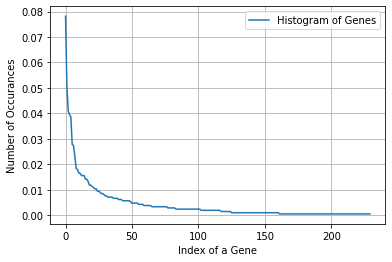

In [31]:
s=sum(unique_gene.values)
h=unique_gene.values/s
plt.plot(h,label="Histogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.07815443 0.12900188 0.16996234 0.20951036 0.24811676 0.27589454
 0.30320151 0.32627119 0.34463277 0.36252354 0.37900188 0.39548023
 0.41101695 0.42655367 0.4420904  0.45621469 0.47033898 0.48352166
 0.4952919  0.50706215 0.51836158 0.52919021 0.53954802 0.54990584
 0.55932203 0.56873823 0.57768362 0.58615819 0.59463277 0.60263653
 0.61016949 0.61770245 0.6247646  0.63182674 0.63888889 0.64595104
 0.65254237 0.65913371 0.66572505 0.67231638 0.67843691 0.68455744
 0.69067797 0.69632768 0.7019774  0.70762712 0.71327684 0.71892655
 0.72457627 0.72975518 0.73446328 0.73917137 0.74387947 0.74858757
 0.75329567 0.75753296 0.76177024 0.76600753 0.77024482 0.7740113
 0.77777778 0.78154426 0.78531073 0.78907721 0.79284369 0.79613936
 0.79943503 0.8027307  0.80602637 0.80932203 0.8126177  0.81591337
 0.81920904 0.82250471 0.82580038 0.82909605 0.83239171 0.83521657
 0.83804143 0.84086629 0.84369115 0.84651601 0.84934087 0.85169492
 0.85404896 0.85640301 0.85875706 0.86111111 0.86346516 0.86581

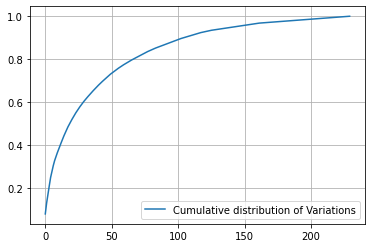

In [32]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

*OneHotCoding*-Gene 


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()
train_gene_onehot = gene_vectorizer.fit_transform(X_train_cv['Gene'])
test_gene_onehot = gene_vectorizer.transform(X_test['Gene'])
cv_gene_onehot = gene_vectorizer.transform(X_test_cv['Gene'])


In [34]:
X_train_cv['Gene'].head()

2136     KEAP1
195       EGFR
2050      SOS1
3096    NOTCH2
3019       KIT
Name: Gene, dtype: object

In [35]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl2',
 'atm',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gna11',
 'gnas',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf

In [36]:
train_gene_onehot.shape

(2124, 230)

For value of alpha= 1e-05 The log loss is: 1.2350157369506398
For value of alpha= 0.0001 The log loss is: 1.2175073550189746
For value of alpha= 0.001 The log loss is: 1.262516959311059
For value of alpha= 0.01 The log loss is: 1.3840732608480257
For value of alpha= 0.1 The log loss is: 1.4785901579300746
For value of alpha= 1 The log loss is: 1.503017402838529


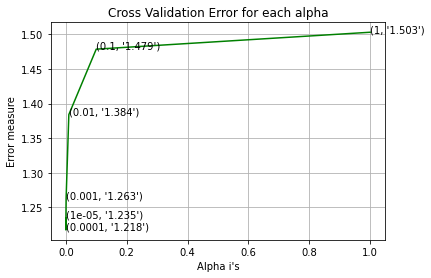

best alpha= 0.0001 The train log loss is: 0.9880774665600386
Best alpha= 0.0001 The cross validation log loss: 1.2175073550189746
Best alpha= 0.0001 The Test log loss : 1.1714033889988305


In [37]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

alpha=[10**x for x in range(-5,1) ]

cv_log_error_array=[]
for i in alpha:
  clf=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  clf.fit(train_gene_onehot,y_train_cv)
  
  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(train_gene_onehot,y_train_cv)
  predict_y=sig_clf.predict_proba(cv_gene_onehot)
  
  cv_log_error_array.append(log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))
  print("For value of alpha=",i,"The log loss is:",log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))

fig,ax=plt.subplots()
ax.plot(alpha,cv_log_error_array,c='g')
for i,txt in enumerate(np.round(cv_log_error_array,3)):
  ax.annotate((alpha[i],str(txt)),(alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha=np.argmin(cv_log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log',random_state=42)
clf.fit(train_gene_onehot,y_train_cv)

sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(train_gene_onehot,y_train_cv)

predict_y=sig_clf.predict_proba(train_gene_onehot)
print("best alpha=",alpha[best_alpha],"The train log loss is:",log_loss(y_train_cv,predict_y,labels=clf.classes_,eps=1e-15))

predict_y=sig_clf.predict_proba(cv_gene_onehot)
print("Best alpha=",alpha[best_alpha],"The cross validation log loss:",log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))

predict_y=sig_clf.predict_proba(test_gene_onehot)
print("Best alpha=",alpha[best_alpha],'The Test log loss :',log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

Checking the Gene feature stable across all the data sets (Test, Train, Cross validation )

In [38]:
print("data points in Test and CV datasets are covered by the", unique_gene.shape[0],"genes in train data")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train_cv['Gene'])))].shape[0]
cv_coverage=X_test_cv[X_test_cv['Gene'].isin(list(set(X_train_cv['Gene'])))].shape[0]

print('In test data',test_coverage,'out of',X_test.shape[0],":",(test_coverage/X_test.shape[0])*100)
print('In cv data',cv_coverage,'out of',X_test_cv.shape[0],":",(cv_coverage/X_test_cv.shape[0])*100)

data points in Test and CV datasets are covered by the 230 genes in train data
In test data 643 out of 665 : 96.69172932330827
In cv data 511 out of 532 : 96.05263157894737


Variation

In [39]:
X_train_cv['Variation'].value_counts().head(10)

Truncating_Mutations    60
Amplification           47
Deletion                44
Fusions                 21
Overexpression           4
Q61L                     3
G12V                     3
EWSR1-ETV1_Fusion        2
Q61H                     2
R170W                    2
Name: Variation, dtype: int64

In [40]:
gene_vectorizer = CountVectorizer()
train_variation_onehot = gene_vectorizer.fit_transform(X_train_cv['Variation'])
test_variation_onehot = gene_vectorizer.transform(X_test['Variation'])
cv_variation_onehot = gene_vectorizer.transform(X_test_cv['Variation'])


In [41]:
train_variation_onehot.shape

(2124, 1966)

For value of alpha= 1e-05 The log loss is 1.7052107473656286
For value of alpha= 0.0001 The log loss is 1.6983108401212605
For value of alpha= 0.001 The log loss is 1.708110301443264
For value of alpha= 0.01 The log loss is 1.7228751611252389
For value of alpha= 0.1 The log loss is 1.7305655700415365
For value of alpha= 1 The log loss is 1.7317795299956542


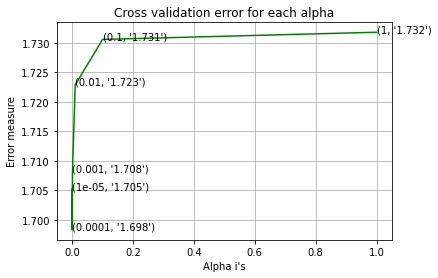

best alpha= 0.0001 The train log loss is : 0.6893764854495487
best alpha= 0.0001 The Cross validation log loss is : 1.6983108401212605
best alpha= 0.0001 The Test log loss : 1.704066674360715


In [42]:
alpha=[10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
  clf=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  clf.fit(train_variation_onehot,y_train_cv)

  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(train_variation_onehot,y_train_cv)
  predict_y=sig_clf.predict_proba(cv_variation_onehot)

  cv_log_error_array.append(log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))
  print("For value of alpha=",i,"The log loss is",log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))

fig,ax=plt.subplots()
ax.plot(alpha,cv_log_error_array,c='g')
for i,txt in enumerate(np.round(cv_log_error_array,3)):
  ax.annotate((alpha[i],str(txt)),(alpha[i],cv_log_error_array[i]))

plt.grid()
plt.title("Cross validation error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha=np.argmin(cv_log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log',random_state=42)
clf.fit(train_variation_onehot,y_train_cv)

sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(train_variation_onehot,y_train_cv)

predict_y=sig_clf.predict_proba(train_variation_onehot)
print("best alpha=",alpha[best_alpha],"The train log loss is :",log_loss(y_train_cv,predict_y,labels=clf.classes_,eps=1e-15))

predict_y=sig_clf.predict_proba(cv_variation_onehot)
print("best alpha=",alpha[best_alpha],"The Cross validation log loss is :",log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))

predict_y=sig_clf.predict_proba(test_variation_onehot)
print("best alpha=",alpha[best_alpha],"The Test log loss :",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

Checking whether the Gene feature stable across all the data sets (Test, Train, Cross validation


In [43]:
unique_variation=X_train_cv['Variation'].value_counts()
print(unique_variation.head(10))

Truncating_Mutations    60
Amplification           47
Deletion                44
Fusions                 21
Overexpression           4
Q61L                     3
G12V                     3
EWSR1-ETV1_Fusion        2
Q61H                     2
R170W                    2
Name: Variation, dtype: int64


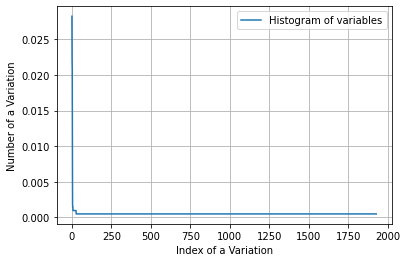

In [44]:
s=sum(unique_variation.values)
h=unique_variation.values/s
plt.plot(h,label="Histogram of variables")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of a Variation')
plt.legend()
plt.grid()
plt.show()

[0.02824859 0.05037665 0.07109228 ... 0.99905838 0.99952919 1.        ]


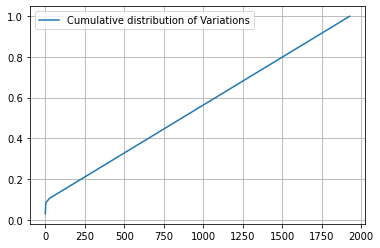

In [45]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [46]:
print("Q12. How many data points are covered by total ", unique_variation.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train_cv['Variation'])))].shape[0]
cv_coverage=X_test_cv[X_test_cv['Variation'].isin(list(set(X_train_cv['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_test_cv.shape[0],":" ,(cv_coverage/X_test_cv.shape[0])*100)

Q12. How many data points are covered by total  1929  genes in test and cross validation data sets?
Ans
1. In test data 67 out of 665 : 10.075187969924812
2. In cross validation data 57 out of  532 : 10.714285714285714


Univariate Analysis on Text Feature

In [47]:
X_train_cv.head()

,ID,Gene,Variation,Class,Text
1432,1432,SPOP,M117V,4,SPOP M117V
27,27,TERT,Y846C,4,heterozygous mutations telomerase components t...
988,988,ETV6,ETV6-NTRK3_Fusion,7,ETV6 ETV6-NTRK3 Fusion
1229,1229,PIK3CB,D1067A,7,PIK3CB D1067A
2190,2190,PTEN,G165R,4,PTEN G165R


In [48]:
import collections
def extract_dictionary_paddle(cls_text):
  dictionary=collections.defaultdict(int)
  for index,row in cls_text.iterrows():
    for word in row['Text'].split():
      dictionary[word]=dictionary[word]+1
  return dictionary

In [49]:
X_train_cv.head()

,ID,Gene,Variation,Class,Text
1432,1432,SPOP,M117V,4,SPOP M117V
27,27,TERT,Y846C,4,heterozygous mutations telomerase components t...
988,988,ETV6,ETV6-NTRK3_Fusion,7,ETV6 ETV6-NTRK3 Fusion
1229,1229,PIK3CB,D1067A,7,PIK3CB D1067A
2190,2190,PTEN,G165R,4,PTEN G165R


In [50]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer=CountVectorizer(min_df=3)
train_text_onehot=text_vectorizer.fit_transform(X_train_cv['Text'])

# getting all the feature names (words)
train_text_features=text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts=train_text_onehot.sum(axis=0).A1
text_fea_dict=dict(zip(list(train_text_features),train_text_fea_counts))

print("Total number of unique words in train data :",len(train_text_features))

Total number of unique words in train data : 8557


In [51]:
dict_list=[]
for i in range(1,10):
  cls_text=X_train_cv[X_train_cv['Class']==i]
  dict_list.append(extract_dictionary_paddle(cls_text))

total_dict=extract_dictionary_paddle(X_train_cv)


confuse_array=[]
for i in train_text_features:
  ratios=[]
  max_val=-1
  for j in range(0,9):
    ratios.append((dict_list[j][i]+10)/(total_dict[i]+90))
  confuse_array.append(ratios)
confuse_array=np.array(confuse_array)

OneHotCoding

In [52]:
from sklearn.preprocessing import normalize
train_text_onehot=normalize(train_text_onehot,axis=0)

# we use the same vectorizer that was trained on train data
test_text_onehot=text_vectorizer.transform(X_test['Text'])

# don't forget to normalize every feature
test_text_onehot=normalize(test_text_onehot,axis=0)

# we use the same vectorizer that was trained on train data
cv_text_onehot=text_vectorizer.transform(X_test_cv['Text'])

# don't forget to normalize every feature
cv_text_onehot=normalize(cv_text_onehot,axis=0)

In [53]:
sorted_text_fea_dict=dict(sorted(text_fea_dict.items(),key=lambda x:x[1],reverse=True))
sorted_text_occur=np.array(list(sorted_text_fea_dict.values()))

In [54]:
sorted_text_fea_dict

{'mutations': 5579,
 'cells': 3814,
 'cbl': 3596,
 'cell': 3534,
 'figure': 2536,
 'et': 2429,
 'cancer': 2408,
 'al': 2387,
 'mutation': 2242,
 'protein': 1991,
 'fig': 1935,
 'dna': 1834,
 'type': 1677,
 'activity': 1559,
 'expression': 1554,
 'binding': 1463,
 'also': 1427,
 'data': 1401,
 'domain': 1396,
 'ptp': 1349,
 'gene': 1346,
 'tumor': 1288,
 'patients': 1258,
 'analysis': 1251,
 'using': 1246,
 '10': 1243,
 'two': 1240,
 'variants': 1231,
 'table': 1225,
 'mutant': 1222,
 'wild': 1216,
 'tumors': 1203,
 'cyclin': 1164,
 'proteins': 1103,
 'may': 1069,
 'genes': 1035,
 'one': 1021,
 'msh6': 980,
 'shown': 975,
 'msh2': 968,
 'dicer1': 956,
 'tgfbr2': 912,
 'tgf': 892,
 'human': 887,
 'used': 886,
 'found': 884,
 'results': 873,
 'associated': 851,
 'cases': 850,
 'lines': 821,
 'identified': 815,
 'observed': 814,
 'tert': 802,
 'supplementary': 798,
 'mutants': 794,
 'cancers': 774,
 'function': 774,
 'muts': 758,
 'msi': 754,
 'egfr': 753,
 'kinase': 749,
 'signaling': 712

In [55]:
from collections import Counter
print(Counter(sorted_text_occur))

Counter({3: 868, 4: 776, 5: 536, 6: 520, 7: 360, 9: 318, 8: 309, 10: 224, 11: 215, 12: 194, 14: 170, 13: 170, 15: 147, 16: 145, 18: 129, 17: 116, 19: 110, 20: 102, 21: 100, 22: 92, 24: 89, 23: 88, 26: 78, 27: 75, 29: 64, 25: 57, 35: 54, 33: 52, 30: 51, 28: 50, 37: 44, 31: 44, 32: 42, 42: 41, 40: 40, 36: 39, 47: 36, 38: 36, 60: 35, 39: 34, 45: 32, 44: 31, 34: 31, 43: 30, 49: 29, 46: 29, 64: 28, 41: 28, 48: 27, 56: 26, 53: 26, 50: 26, 69: 23, 55: 23, 51: 23, 54: 21, 52: 21, 67: 20, 62: 20, 59: 20, 73: 19, 72: 19, 66: 19, 79: 18, 57: 18, 76: 17, 71: 17, 63: 17, 61: 17, 90: 16, 85: 16, 70: 16, 86: 15, 81: 15, 77: 15, 74: 15, 65: 15, 58: 15, 89: 14, 78: 14, 95: 13, 84: 13, 83: 13, 115: 12, 109: 12, 88: 12, 80: 12, 111: 11, 101: 11, 133: 10, 126: 10, 122: 10, 97: 10, 82: 10, 129: 9, 125: 9, 118: 9, 117: 9, 112: 9, 100: 9, 99: 9, 91: 9, 136: 8, 131: 8, 116: 8, 108: 8, 104: 8, 103: 8, 102: 8, 96: 8, 94: 8, 87: 8, 68: 8, 189: 7, 121: 7, 113: 7, 107: 7, 106: 7, 93: 7, 92: 7, 75: 7, 312: 6, 184: 

For values of alpha =  1e-05 The log loss is: 1.66770070525088
For values of alpha =  0.0001 The log loss is: 1.6352489942803343
For values of alpha =  0.001 The log loss is: 1.6727560960634562
For values of alpha =  0.01 The log loss is: 1.7615855586703166
For values of alpha =  0.1 The log loss is: 1.8324854667864623
For values of alpha =  1 The log loss is: 1.8333484239116737


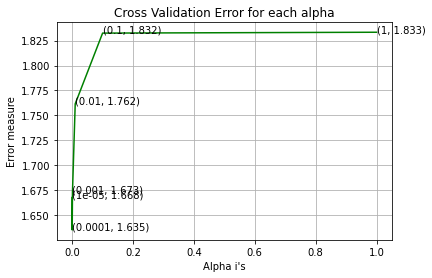

For values of best alpha =  0.0001 The train log loss is: 1.5185111087285974
For values of best alpha =  0.0001 The cross validation log loss is: 1.6352489942803343
For values of best alpha =  0.0001 The test log loss is: 1.5455406547222723


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=42,
                                                    shuffle=True, tol=0.001,
                                          

In [56]:
alpha=[10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
  clf=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  clf.fit(train_text_onehot,y_train_cv)

  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(train_text_onehot,y_train_cv)

  predict_y = sig_clf.predict_proba(cv_text_onehot)
  cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
  print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_onehot, y_train_cv)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_onehot, y_train_cv)

predict_y = sig_clf.predict_proba(train_text_onehot)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_onehot)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_onehot)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

sig_clf.fit(train_text_onehot, y_train_cv)


In [57]:
def get_intersec_text(df):
  df_text_vec=CountVectorizer(min_df=3)
  df_text_fea=df_text_vec.fit_transform(df['Text'])
  df_text_features=df_text_vec.get_feature_names()

  df_text_fea_counts=df_text_fea.sum(axis=0).A1
  df_text_fea_dict=dict(zip(list(df_text_features),df_text_fea_counts))
  len1=len(set(df_text_features))
  len2 = len(set(train_text_features) & set(df_text_features))
  return len1,len2

In [58]:
len1,len2 = get_intersec_text(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(X_test_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

99.639 % of word of test data appeared in train data
97.623 % of word of Cross Validation appeared in train data


Machine Learning Models

In [59]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [60]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [87]:
# function will be used just for naive bayes
#  given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not

def get_impfeature_names(indices,text,gene,var,no_features):
  gene_count_vec=CountVectorizer()
  var_count_vec=CountVectorizer()
  text_count_vec=CountVectorizer(min_df=3)

  gene_vec=gene_count_vec.fit(X_train_cv['Gene'])
  var_vec=var_count_vec.fit(X_train_cv['Variation'])
  text_vec=text_count_vec.fit(X_train_cv['Text'])

  fea1_len=len(gene_vec.get_feature_names())
  fea2_len=len(var_count_vec.get_feature_names())

  word_present=0
  for i,v in enumerate(indices):
    if (v<fea1_len):
      word=gene_vec.get_feature_names()[v]
      yes_no=True if word==gene else False
      if yes_no:
        word_present+=1
        print(i,"Gene feature [{}] present in test data point [{}]".format(word,yes_no))

    elif (v<fea1_len+fea2_len):
      word=var_vec.get_feature_names()[v-(fea1_len)]
      yes_no=True if word ==var else False
      if yes_no:
        word_present+=1
        print(i,"variation feature [{}] present in test data points [{}]".format(word,yes_no))

    else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")   

In [88]:
!pip install scipy

In [89]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]
#import scipy.sparse.csr_matrix
from scipy.sparse import hstack
train_gene_var_onehotCoding = hstack((train_gene_onehot,train_variation_onehot))
test_gene_var_onehotCoding = hstack((test_gene_onehot,test_variation_onehot))
cv_gene_var_onehotCoding = hstack((cv_gene_onehot,cv_variation_onehot))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_onehot)).tocsr()
train_y = np.array(list(X_train_cv['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_onehot)).tocsr()
test_y = np.array(list(X_test['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_onehot)).tocsr()
cv_y = np.array(list(X_test_cv['Class']))




In [90]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 10753)
(number of data points * number of features) in test data =  (665, 10753)
(number of data points * number of features) in cross validation data = (532, 10753)


Base Line Model

<h3>Naive Bayes</h3>

for alpha= 1e-05
Log Loss : 1.4391865006204605
for alpha= 0.0001
Log Loss : 1.4350861291716703
for alpha= 0.001
Log Loss : 1.4191348396457368
for alpha= 0.1
Log Loss : 1.2938232785883752
for alpha= 1
Log Loss : 1.2293117350549125
for alpha= 10
Log Loss : 1.2973593468790559
for alpha= 100
Log Loss : 1.391318132967686
for alpha= 1000
Log Loss : 1.387174709724163


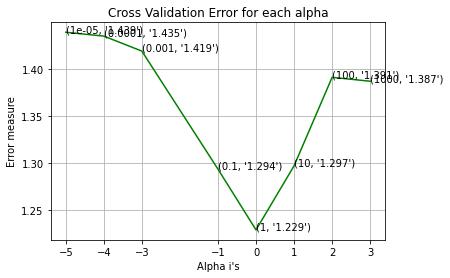

For values of best alpha =  1 The train log loss is: 0.7572262547738006
For values of best alpha =  1 The cross validation log loss is: 1.2293117350549125
For values of best alpha =  1 The test log loss is: 1.2408032561873985


In [91]:
from sklearn.naive_bayes import MultinomialNB
alpha=[0.00001,0.0001,0.001,0.1,1,10,100,1000]
cv_log_error_array=[]
for i in alpha:
  print("for alpha=",i)
  clf=MultinomialNB(alpha=i)
  clf.fit(train_x_onehotCoding,train_y)
  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(train_x_onehotCoding,train_y)
  sig_clf_probs=sig_clf.predict_proba(cv_x_onehotCoding)
  cv_log_error_array.append(log_loss(cv_y,sig_clf_probs,labels=clf.classes_,eps=1e-15))
  # to avoid rounding error while multiplying probabilites we use log-probability estimates
  print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2293117350549125
Number of missclassified point : 0.42857142857142855
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


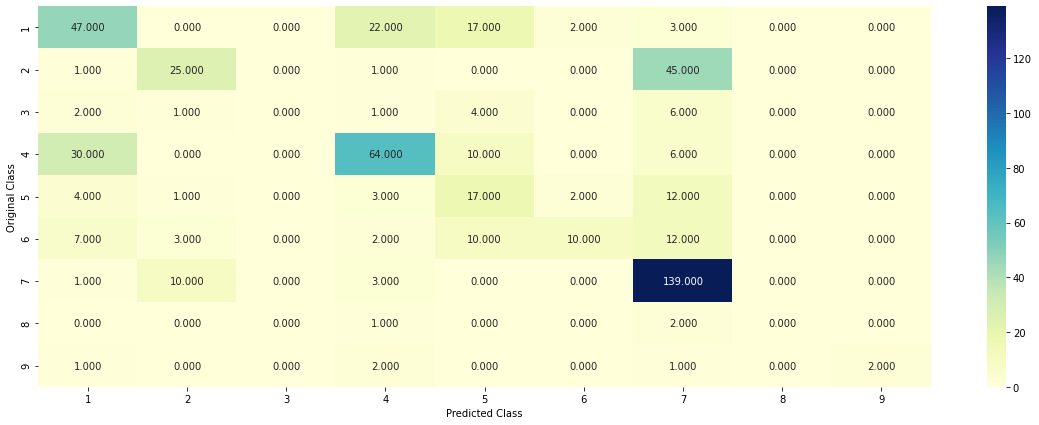

-------------------- Precision matrix (Columm Sum=1) --------------------


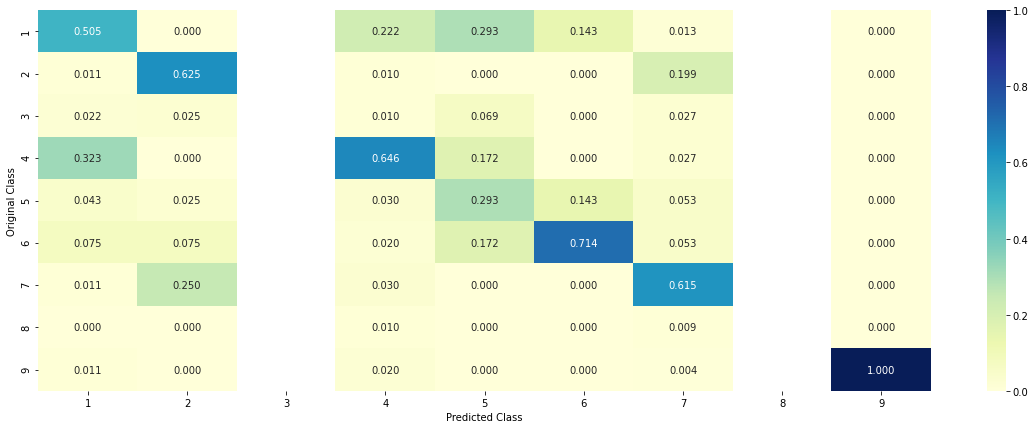

-------------------- Recall matrix (Row sum=1) --------------------


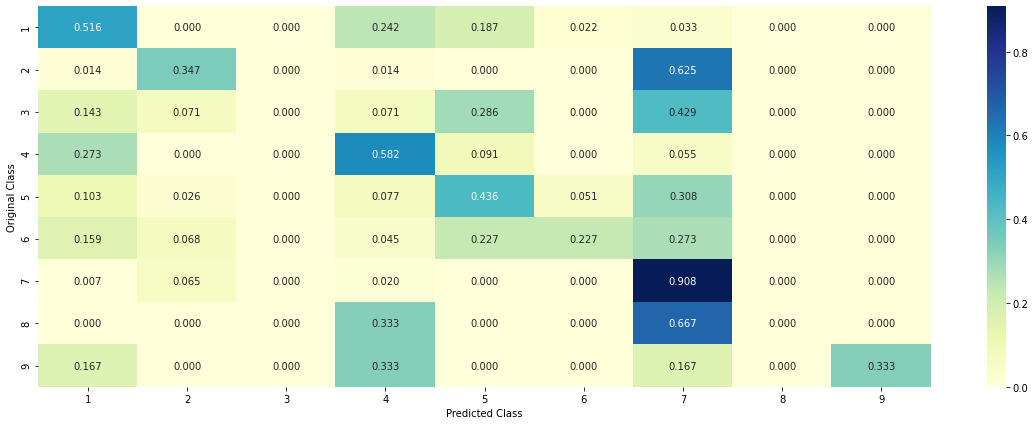

In [92]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [93]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0753 0.0364 0.0154 0.777  0.0281 0.0319 0.029  0.0027 0.0041]]
Actual Class : 4
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 a

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [94]:
test_point_index=100
no_feature=100
predicted_cls=sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :",predicted_cls[0])
print("Predicted class probabilities:",np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted class probabilities: [[0.0583 0.0791 0.0614 0.0457 0.0314 0.0319 0.6848 0.003  0.0045]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 are present in query point
Out of the top  100  features  0 a

<h2>K Nearest Neighbour Classification</h2>

for alpha = 5
Log Loss : 1.2899020510499795
for alpha = 11
Log Loss : 1.2613247356676995
for alpha = 15
Log Loss : 1.2665389728714282
for alpha = 21
Log Loss : 1.2872141116503355
for alpha = 31
Log Loss : 1.2950156571705311
for alpha = 41
Log Loss : 1.3137865893626366
for alpha = 51
Log Loss : 1.3524352378812554
for alpha = 99
Log Loss : 1.4201277358446946


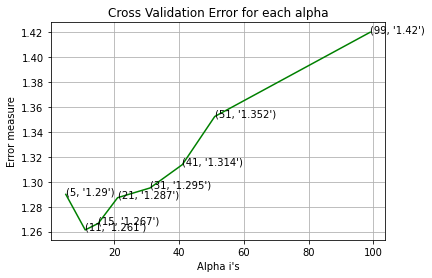

For values of best alpha =  11 The train log loss is: 1.0388378698687546
For values of best alpha =  11 The cross validation log loss is: 1.2613247356676995
For values of best alpha =  11 The test log loss is: 1.2638148146386234


In [96]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>Hyper parameter tuning</h3>

<h4> Testing the model with best hyper paramters</h4>

Log loss : 1.2613247356676995
Number of mis-classified points : 0.4417293233082707
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


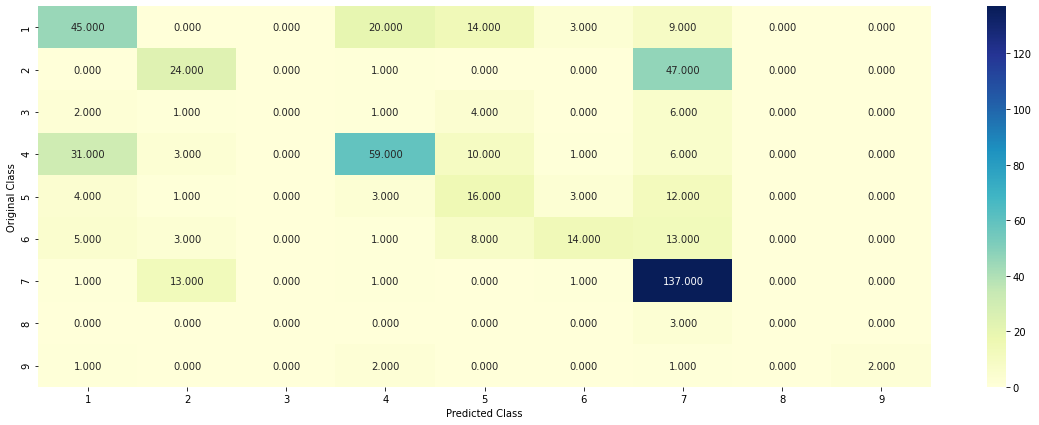

-------------------- Precision matrix (Columm Sum=1) --------------------


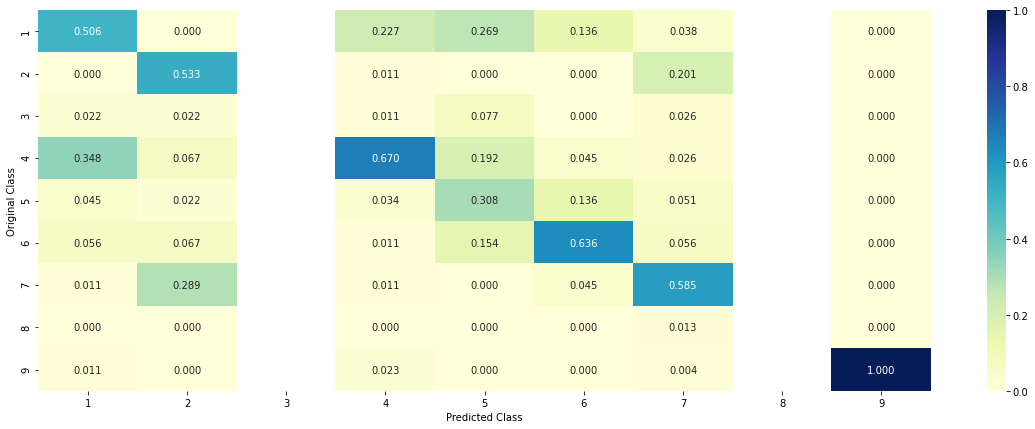

-------------------- Recall matrix (Row sum=1) --------------------


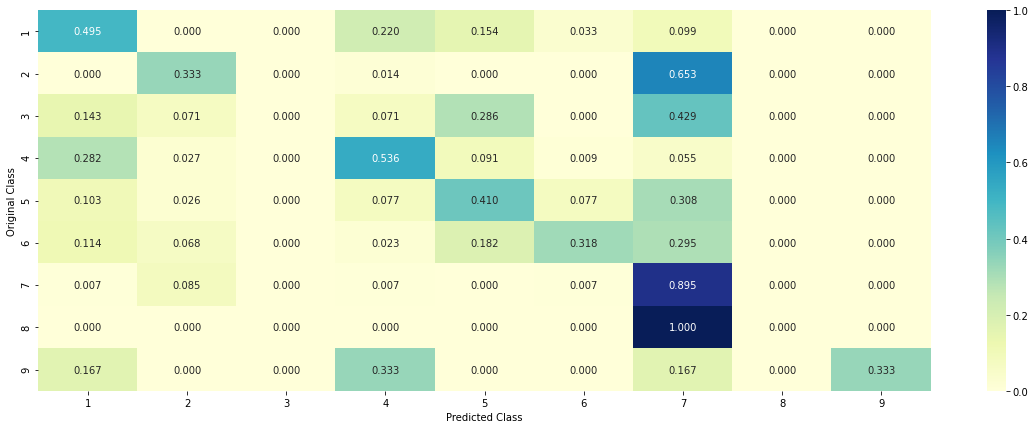

In [97]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h3>Sample Query Point-1 </h3>

In [98]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_onehotCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_onehotCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
The  11  nearest neighbours of the test points belongs to classes [4 4 4 4 6 4 4 4 4 1 4]
Fequency of nearest points : Counter({4: 9, 6: 1, 1: 1})


<h3>Sample Query Point-2 </h3>

In [99]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_onehotCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [2 7 2 2 7 3 3 7 3 2 7]
Fequency of nearest points : Counter({2: 4, 7: 4, 3: 3})
